# Encoder-Decoder Network


# Encoder-Decoder automatically consists of two structures: the encoder and the decoder. The encoder network downsamples the data into lower dimensions and the decoder network reconstructs the original data from the lower dimension representation. The lower dimension representation is usually called latent space representation.


![alt text](https://cdn-images-1.medium.com/max/1000/1*8ixTe1VHLsmKB3AquWdxpQ.png)

# Load Libraries

First step is to load the required libraries.

In [ ]:
import numpy 

import matplotlib.pyplot as plt

from keras.models import Sequential

from keras.layers import Dense

from keras.utils import np_utils

from keras.datasets import mnist

# Load Dataset in Numpy Format

MNIST is a simple computer vision dataset. It consists of images of handwritten digits. It also includes labels for each image, telling us which digit it is.

The MNIST data is split into three parts: $60,000$ data points of training data, and $10,000$ points of test data. Each image is 28 pixels by 28 pixels.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

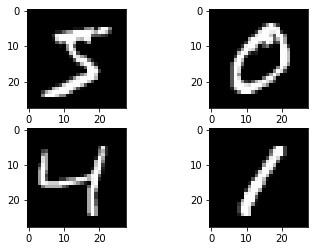

In [ ]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# Formatting Data for Keras

We can flatten this array into a vector of $28\times28 = 784$ numbers. It doesn't matter how we flatten the array, as long as we're consistent between images. From this perspective, the MNIST images are just a bunch of points in a 784-dimensional vector space. The data should always be of the format (Number of data points, data point dimension). In this case the training data will be of format $60,000\times784$.

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')

X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

X_train = X_train / 255

X_test = X_test / 255

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

## Adding Noise to Images

Let's first define a noise factor which is a hyperparameter. The noise factor is multiplied with a random matrix that has a mean of 0.0 and standard deviation of 1.0. This matrix will draw samples from normal (Gaussian) distribution. The shape of the random normal array will be similar to the shape of the data you will be adding the noise.

In [ ]:
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

# Defining a encoder decoder network

It will have a input layer of $784$ neurons, i.e. the input dimension and output layer of $784$ neurons.

In [ ]:
# create model

model = Sequential()

model.add(Dense(500, input_dim=num_pixels, activation='relu'))

model.add(Dense(300, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(300, input_dim=num_pixels, activation='relu'))

model.add(Dense(500, activation='relu'))

model.add(Dense(784, activation='sigmoid'))


# Compiling the model

Once the model is defined, we have to compile it. While compiling we provide the loss function to be used, the optimizer and any metric.

In [ ]:
# Compile model

model.compile(loss='mean_squared_error', optimizer='adam')


# Training/Fitting the model

Now the model is ready to be trained. We will provide training data to the network. Also we will specify the validation data, over which the model will only be validated.

In [ ]:
# Training model

model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=2, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 14s 232us/step - loss: 0.0418 - val_loss: 0.0198
Epoch 2/2
60000/60000 [==============================] - 13s 218us/step - loss: 0.0166 - val_loss: 0.0137


# Evaluating the model

Finally we will evaluate the model on the testing dataset.

In [ ]:
# Final evaluation of the model

pred = model.predict(x_test_noisy)

In [ ]:
pred.shape

(10000, 784)

In [ ]:
X_test.shape

(10000, 784)

Test Images


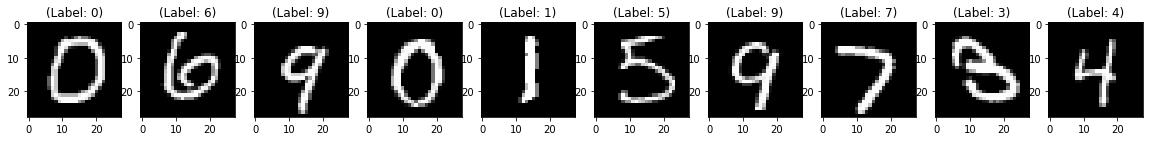

Test Images with Noise


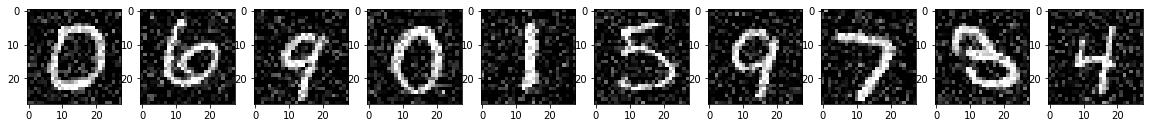

Reconstruction of Noisy Test Images


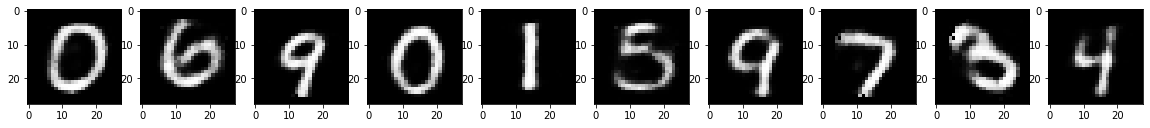

In [ ]:
X_test = numpy.reshape(X_test, (-1,28,28)) *255
pred = numpy.reshape(pred, (-1,28,28)) *255
x_test_noisy = numpy.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i,:,:], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()    

plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()